# <u>Sentiment Analysis</u>:

# <u>Project Members</u>:
## Anup Deulgaonkar
## Subhadeep Roy
## Yogesh Palav

## <u>Project Description</u>:
### Building a Sentiment Analysis Framework which could classify reviews into Labels such as Positive, Negative or Neutral. We collected data from multiple domains.

## Corpus
https://dl.dropboxusercontent.com/u/89582947/Dataset/train.zip

In [170]:
%%time
# Import File and Packages
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")
import glob
from pandas import read_csv

all_files = glob.glob(".\\train\\neg\\*.txt")
df_neg = pd.concat((pd.read_csv(f, sep=';*;;', header = None, quoting=3 , encoding='utf-8') for f in all_files))
df_neg.columns = ['data']
df_neg['target']=np.zeros((df_neg.shape[0],1))
neg_len=len(all_files)
all_files = glob.glob(".\\train\\pos\\*.txt")
df_pos = pd.concat((pd.read_csv(f, sep=';*;;', header = None, quoting=3 , encoding='utf-8') for f in all_files))
df_pos.columns = ['data']
df_pos['target']=np.ones((df_pos.shape[0],1))
pos_len=len(all_files)
frames = [df_neg, df_pos]
df = pd.concat(frames)
df.columns = ['data','target']


Wall time: 27.1 s


In [171]:
print(pos_len, neg_len)

12500 12500


### Load and preprocess data using NLTK:
##### Tokenize, Clean, Stem, Lemmatize, Remove stopwords

In [172]:
# Preprocess the data {'negative': 0 , 'positive': 1 , 'neutral': 2}

#df=tweet.iloc[:,(10,1)]
#df.columns = ['data', 'target']
#df['target']=df['target'].str.strip().str.lower()
#df['target']=df['target'].map({'negative': 0 , 'positive': 1 , 'neutral': 2})

# Copy df to a temporary dataframe for pre-processing
# Below assignment is causing problems
dft=df

In [173]:
%%time
# Remove @tweets, numbers, hyperlinks that do not start with letters
dft['data']=dft['data'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ")

# tokenize into words
import nltk
dft['data']=dft['data'].apply(nltk.word_tokenize)

Wall time: 27.8 s


In [174]:
%%time
# stem the tokens
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
dft['data']=dft['data'].apply(lambda x: [stemmer.stem(y) for y in x])

Wall time: 1min 14s


In [175]:
%%time
# Lemmatizing
lemmatizer = nltk.WordNetLemmatizer()
dft['data']=dft['data'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

Wall time: 26.3 s


In [176]:
%%time
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

# stem the stopwords
stemmed_stops = [stemmer.stem(t) for t in stopwords]

# remove stopwords from stemmed/lemmatized tokens
dft['data']=dft['data'].apply(lambda x: [stemmer.stem(y) for y in x if y not in stemmed_stops])

# remove words whose length is <3
dft['data']=dft['data'].apply(lambda x: [e for e in x if len(e) >= 3])

Wall time: 1min


In [177]:
%%time
# Detokenize cleaned dataframe for vectorizing
dft['data']=dft['data'].str.join(" ")

Wall time: 229 ms


### Printing data shape:

<Container object of 2 artists>

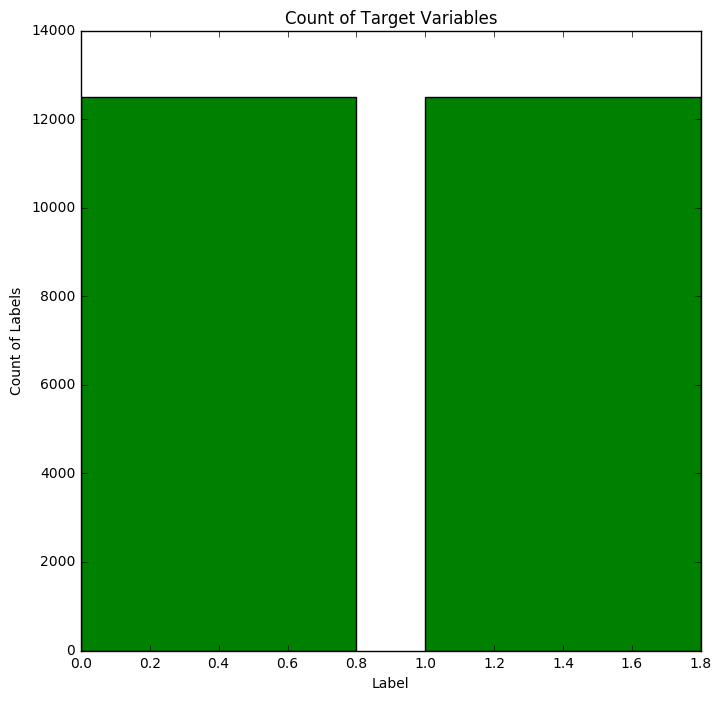

In [178]:


x=[0,1]
y=[neg_len, pos_len]
plt.figure(1,figsize=(8, 8))
plt.xlabel('Label')
plt.ylabel('Count of Labels')
plt.title('Count of Target Variables')
plt.bar(x, y,color='g')
#plt.xticks(x, ,rotation=90)

### Print top features with frequency:

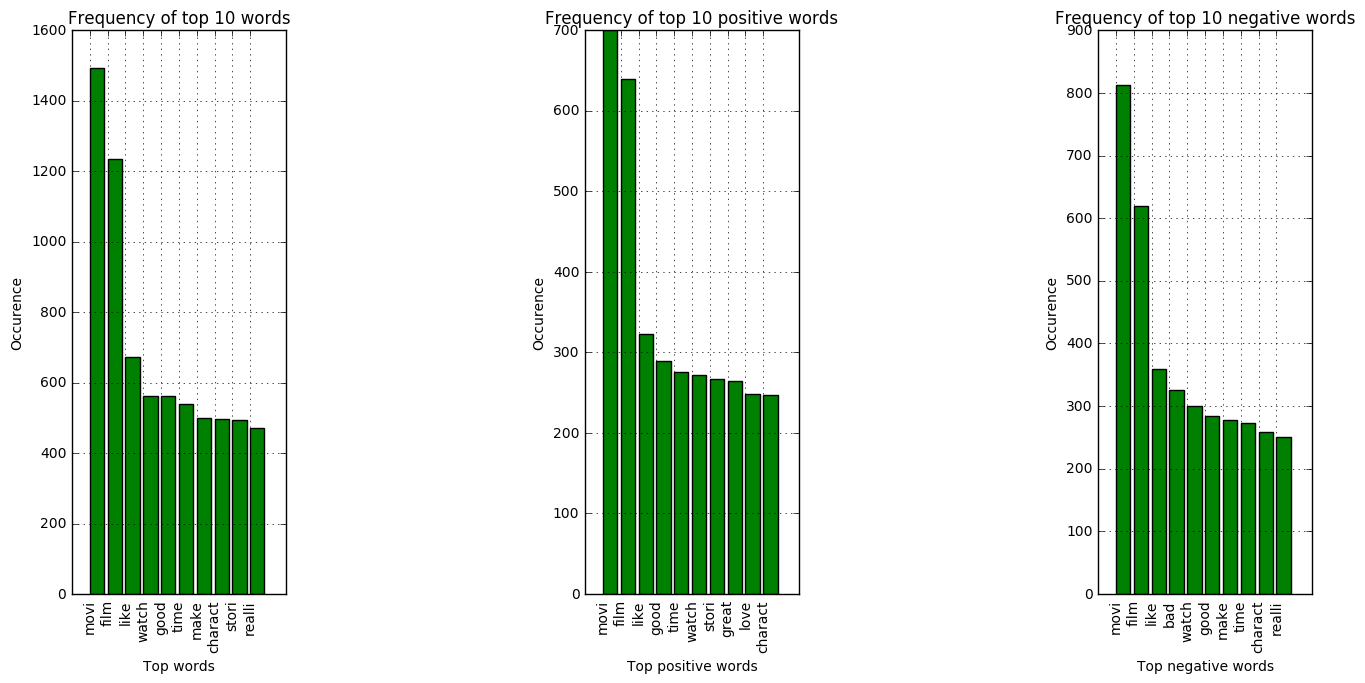

In [179]:
def print_top_words():    
    # Print top words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    data_dtm = vect.fit_transform(dft['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_neg_words():    
    # Print top negative words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 0]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top negative words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top negative words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 negative words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_pos_words():    
    # Print top positive words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 1]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top positive words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top positive words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 positive words')
    plt.xticks(X,topt['Word'],rotation=90)


plt.figure(1,figsize=(16, 16))
plt.subplot(251)
print_top_words()  
plt.subplot(253)
print_top_pos_words()
plt.subplot(255)
print_top_neg_words()

## Performance Measure using multiple classifiers
### Performance Parameters: Accuracy, Precision, Recall, F1
### Classifiers: Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Linear SVC, ADA Boost
### Validation: Cross Validation with KFold=10

In [180]:
%%time
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from collections import defaultdict
from sklearn import metrics
#from sklearn.feature_extraction.text import CountVectorizer

#Tfid shows less accuracy
from sklearn.feature_extraction.text import TfidfVectorizer

X=dft['data']
y=dft['target']

arr_Accu=[]

#Using train_test_split
#Selecting the best random state and comapring the accuracy using Naive Bayes
#r = 20
#for i in range(1,r):
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
feat_dtm = vect.get_feature_names()
#feat_dtm

classifiers = defaultdict()
classifiers['Naive Bayes'] = MultinomialNB()
classifiers['Logistic Regression'] = LogisticRegression()
classifiers['Decision Tree'] = DecisionTreeClassifier(random_state=0)
classifiers['Random Forest'] = RandomForestClassifier(criterion='entropy')
classifiers['ADA Boost'] = AdaBoostClassifier()
classifiers['Linear SVC'] = LinearSVC()
classifiers_performance = defaultdict(lambda: defaultdict(lambda: 0))

scoring = ['accuracy','precision','recall','f1']
for key in classifiers:
    for score in scoring:
        classifiers_performance[key][score] = np.mean(cross_val_score(classifiers[key],X_train_dtm,y_train,cv=10,scoring=score))

Wall time: 18min 23s


## Comparison of classifiers including Random Prediction

<Container object of 8 artists>

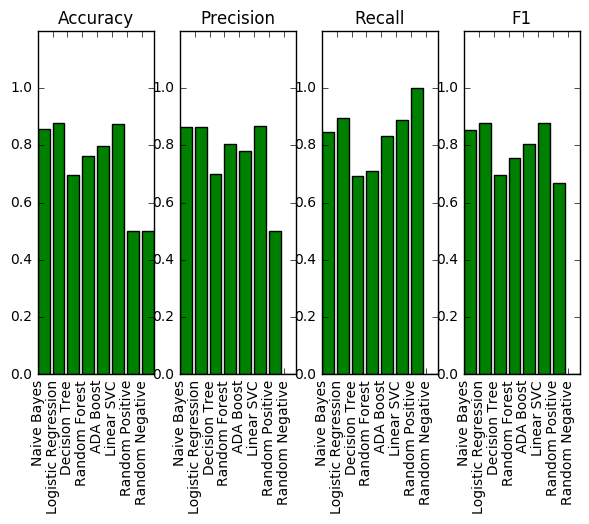

In [181]:
# Predict performance of random prediction. Testing for positive classes.
y_random_pred_pos = np.ones(y_train.shape[0])

# Predict performance of majority class prediction. Testing for negative classes.
y_random_pred_neg = np.zeros(y_train.shape[0])

acc = list()
precision = list()
rec = list()
f1 = list()

plt.grid()

plt.figure(1,figsize=(12, 20),dpi=80)

scoring = ['accuracy','precision','recall','f1']
classifier_l = ['Naive Bayes','Logistic Regression','Decision Tree','Random Forest','ADA Boost','Linear SVC']
X = range(1, 9)

for clf in classifier_l:
        acc.append(classifiers_performance[clf]['accuracy'])
        precision.append(classifiers_performance[clf]['precision'])
        rec.append(classifiers_performance[clf]['recall'])
        f1.append(classifiers_performance[clf]['f1'])

classifier_l.append('Random Positive')
acc.append(metrics.accuracy_score(y_train, y_random_pred_pos))
precision.append(metrics.precision_score(y_train, y_random_pred_pos))
rec.append(metrics.recall_score(y_train, y_random_pred_pos))
f1.append(metrics.f1_score(y_train, y_random_pred_pos))

classifier_l.append('Random Negative')
acc.append(metrics.accuracy_score(y_train, y_random_pred_neg))
precision.append(metrics.precision_score(y_train, y_random_pred_neg))
rec.append(metrics.recall_score(y_train, y_random_pred_neg))
f1.append(metrics.f1_score(y_train, y_random_pred_neg))
        
plt.subplot(141)
plt.subplots_adjust(wspace=4)
plt.tight_layout()
plt.xticks(X,classifier_l,rotation=90)
plt.title('Accuracy')
plt.ylim(0,1.2)
plt.bar(X,acc,color='g')

plt.subplot(142)
plt.xticks(X,classifier_l,rotation=90)
plt.title('Precision')
plt.ylim(0,1.2)
plt.bar(X,precision,color='g')

plt.subplot(143)
plt.xticks(X,classifier_l,rotation=90)
plt.title('Recall')
plt.ylim(0,1.2)
plt.bar(X,rec,color='g')

plt.subplot(144)
plt.xticks(X,classifier_l,rotation=90)
plt.title('F1')
plt.ylim(0,1.2)
plt.bar(X,f1,color='g')

## Prediction on Test Dataset
### Selecting best classifier(runtime) using precision as the critierion

In [182]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score
from collections import defaultdict
import time

classifiers['Naive Bayes'] = MultinomialNB()
classifiers['Logistic Regression'] = LogisticRegression()
classifiers['Decision Tree'] = DecisionTreeClassifier(random_state=0)
classifiers['Random Forest'] = RandomForestClassifier(criterion='entropy')
classifiers['ADA Boost'] = AdaBoostClassifier()
classifiers['Linear SVC'] = LinearSVC()
target_names = ['Negative', 'Positive']

report = defaultdict()
matrix = defaultdict()

classifier_runtime = list()
classifier_names = list()

max_precision = 0.0
runtime_selected_clf = classifiers['Naive Bayes']
for key in classifiers:
    start_time = time.time()
    classifiers[key].fit(X_train_dtm,y_train)
    runtime = time.time() - start_time
    classifier_runtime.append(runtime)
    classifier_names.append(key)
    clf_predictions = classifiers[key].predict(X_test_dtm)
    sc = precision_score(y_test,clf_predictions)
    if(sc > max_precision):
        max_precision = sc
        runtime_selected_clf = classifiers[key]
    report[key] = classification_report(y_test, clf_predictions, target_names=target_names)
    matrix[key] = confusion_matrix(y_test, clf_predictions)

## Classifier Runtime, Report and Confusion Matrix

([<matplotlib.axis.XTick at 0x1918eaa4048>,
 <a list of 6 Text xticklabel objects>)

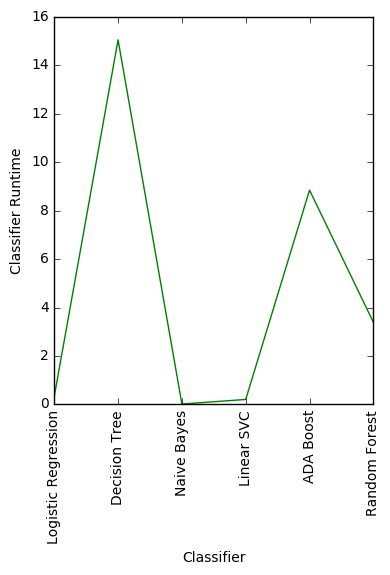

In [183]:
x=range(1,(len(classifier_runtime)+1))
plt.figure(1,figsize=(14, 5))

plt.subplot(133)
plt.xlabel('Classifier')
plt.ylabel('Classifier Runtime')
plt.plot(x, classifier_runtime,color='g')
plt.xticks(x,classifier_names,rotation=90)    

Performance Measure for Naive Bayes: 
             precision    recall  f1-score   support

   Negative       0.85      0.87      0.86      4135
   Positive       0.87      0.85      0.86      4115

avg / total       0.86      0.86      0.86      8250



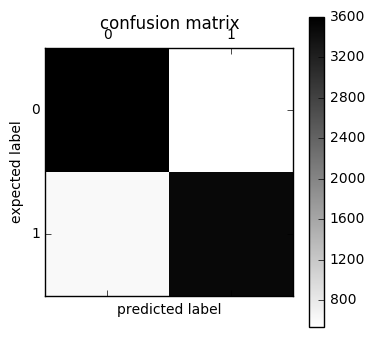

In [184]:
print('Performance Measure for Naive Bayes: ')
print(report['Naive Bayes'])
plt.matshow(matrix['Naive Bayes'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Performance Measure for Logistic Regression: 
             precision    recall  f1-score   support

   Negative       0.89      0.88      0.89      4135
   Positive       0.88      0.90      0.89      4115

avg / total       0.89      0.89      0.89      8250



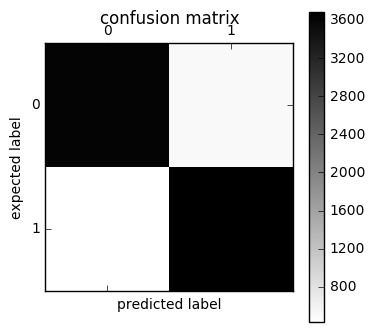

In [185]:
print('Performance Measure for Logistic Regression: ')
print(report['Logistic Regression'])
plt.matshow(matrix['Logistic Regression'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Performance Measure for Decision Tree: 
             precision    recall  f1-score   support

   Negative       0.70      0.71      0.70      4135
   Positive       0.70      0.70      0.70      4115

avg / total       0.70      0.70      0.70      8250



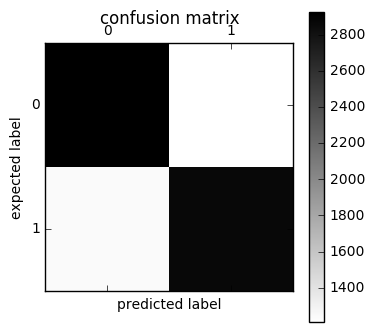

In [186]:
print('Performance Measure for Decision Tree: ')
print(report['Decision Tree'])
plt.matshow(matrix['Decision Tree'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Performance Measure for SVC: 
             precision    recall  f1-score   support

   Negative       0.89      0.87      0.88      4135
   Positive       0.88      0.89      0.88      4115

avg / total       0.88      0.88      0.88      8250



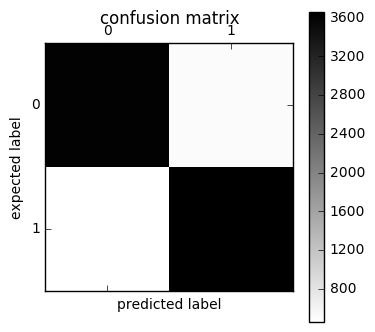

In [187]:
print('Performance Measure for SVC: ')
print(report['Linear SVC'])
plt.matshow(matrix['Linear SVC'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Performance Measure for Random Forest: 
             precision    recall  f1-score   support

   Negative       0.74      0.83      0.79      4135
   Positive       0.81      0.71      0.76      4115

avg / total       0.78      0.77      0.77      8250



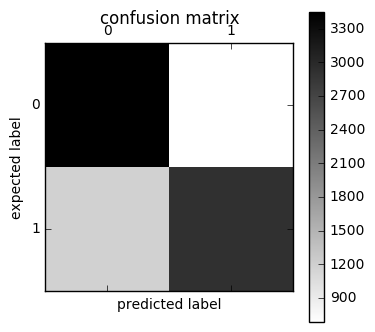

In [188]:
print('Performance Measure for Random Forest: ')
print(report['Random Forest'])
plt.matshow(matrix['Random Forest'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Performance Measure for ADA Boost: 
             precision    recall  f1-score   support

   Negative       0.83      0.78      0.80      4135
   Positive       0.79      0.84      0.81      4115

avg / total       0.81      0.81      0.81      8250



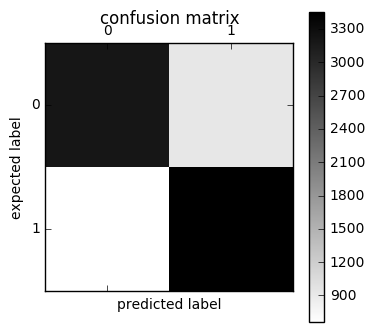

In [189]:
print('Performance Measure for ADA Boost: ')
print(report['ADA Boost'])
plt.matshow(matrix['ADA Boost'], cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

## Coefficients for Classifier which is choosen depending on the highest precision on training set:

In [190]:
col_sums = X_train_dtm.sum(axis=0).A1
top_indices = np.argsort(col_sums)[::-1][:100]
top_terms = np.array(feat_dtm)[top_indices]

weights = sorted(runtime_selected_clf.coef_[0],reverse=True)[:100]

term_weights = list()
for i in range(len(top_terms)):
    term_weights.append((top_terms[i],weights[i]))

In [191]:
term_weights

[('movi', 6.5336357786851043),
 ('film', 5.896645491788604),
 ('like', 4.8180224201369182),
 ('watch', 4.5629449624117937),
 ('good', 4.444201616722073),
 ('time', 4.4220678681382033),
 ('make', 3.8702147559218161),
 ('stori', 3.5691884629781736),
 ('charact', 3.4103070192469556),
 ('realli', 3.1465318695864797),
 ('bad', 2.9709550587727183),
 ('great', 2.9466137851970151),
 ('scene', 2.8055050203117475),
 ('act', 2.7555891414456908),
 ('peopl', 2.6764244509806767),
 ('love', 2.6545168061465065),
 ('think', 2.5595426724374133),
 ('look', 2.5206173192659747),
 ('end', 2.5156817418479638),
 ('way', 2.4747621581610892),
 ('thing', 2.4452580762585097),
 ('seen', 2.2985615506185324),
 ('plot', 2.2559110062818459),
 ('actor', 2.2509919162221355),
 ('play', 2.2298311553069454),
 ('say', 2.2066148679162927),
 ('know', 2.1927795960070338),
 ('best', 2.1871589827015607),
 ('want', 2.1639504622877261),
 ('year', 2.1531947813470094),
 ('life', 2.0948669275887029),
 ('mani', 2.0923358355116206),
 (